In [8]:
import numpy as np
import os, h5py
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, Activation, LeakyReLU, Flatten, Dropout
from keras.models import Model, Sequential, load_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

(600, 64, 64) (600, 1)
(150, 64, 64) (150, 1)


/home/mac/venv/lib/python3.6/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


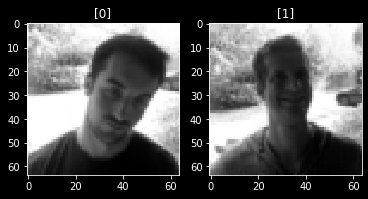

In [9]:
base_path = 'dataset'

x_train = np.load(os.path.join(base_path, 'x_train.npy'))
y_train = np.load(os.path.join(base_path, 'y_train.npy'))
x_test = np.load(os.path.join(base_path, 'x_test.npy'))
y_test = np.load(os.path.join(base_path, 'y_test.npy'))

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

plt.subplot(1, 2, 1)
plt.title(y_train[0])
plt.imshow(x_train[0], cmap='gray')
plt.subplot(1, 2, 2)
plt.title(y_train[1])
plt.imshow(x_train[1], cmap='gray')

In [10]:
x_train = x_train.reshape((-1, 64, 64, 1))
x_test = x_test.reshape((-1, 64, 64, 1))

train_datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    brightness_range=[0.5, 1.5],
    zoom_range=[0.8, 1.1],
    rotation_range=15.,
    channel_shift_range=25,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
)

train_batch_gen = train_datagen.flow(x_train, y_train, batch_size=16, shuffle=True)
test_batch_gen = test_datagen.flow(x_test, y_test, batch_size=16, shuffle=False)

In [11]:
inputs = Input(shape=(64, 64, 1))

net = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(inputs)
net = LeakyReLU()(net)

net = Flatten()(net)

net = Dense(units=64)(net)
net = Activation('relu')(net)

net = Dense(units=1)(net)
outputs = Activation('sigmoid')(net)

model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        640       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4194368   
_________________________________________________________________
activation_3 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65  

In [15]:
model.fit_generator(
    train_batch_gen,
    epochs=100,
    validation_data=test_batch_gen,
    callbacks=[
        ModelCheckpoint('models/happy.h5', monitor='val_acc', save_best_only=True, mode='max', verbose=1),
        ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=5, verbose=1, mode='auto', min_lr=1e-05)
    ]
)

Epoch 1/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2148 - acc: 0.9133 - val_loss: 0.2824 - val_acc: 0.9133

Epoch 00001: val_acc improved from -inf to 0.91333, saving model to models/happy.h5
Epoch 2/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2026 - acc: 0.9200 - val_loss: 0.2797 - val_acc: 0.9133

Epoch 00002: val_acc did not improve from 0.91333
Epoch 3/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2114 - acc: 0.9250 - val_loss: 0.2994 - val_acc: 0.9267

Epoch 00003: val_acc improved from 0.91333 to 0.92667, saving model to models/happy.h5
Epoch 4/100
38/38 [==============================] - 0s 10ms/step - loss: 0.2073 - acc: 0.9217 - val_loss: 0.2900 - val_acc: 0.9133

Epoch 00004: val_acc did not improve from 0.92667
Epoch 5/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2166 - acc: 0.9217 - val_loss: 0.2894 - val_acc: 0.9200

Epoch 00005: val_acc did not improve from 0.92667
Epoch 6/100
38

Epoch 45/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2279 - acc: 0.9200 - val_loss: 0.2774 - val_acc: 0.9200

Epoch 00045: val_acc did not improve from 0.93333
Epoch 46/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2181 - acc: 0.9050 - val_loss: 0.2745 - val_acc: 0.9200

Epoch 00046: val_acc did not improve from 0.93333
Epoch 47/100
38/38 [==============================] - 0s 10ms/step - loss: 0.2187 - acc: 0.9233 - val_loss: 0.2723 - val_acc: 0.9200

Epoch 00047: val_acc did not improve from 0.93333
Epoch 48/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2187 - acc: 0.9200 - val_loss: 0.2754 - val_acc: 0.9200

Epoch 00048: val_acc did not improve from 0.93333
Epoch 49/100
38/38 [==============================] - 0s 10ms/step - loss: 0.1988 - acc: 0.9117 - val_loss: 0.2798 - val_acc: 0.9200

Epoch 00049: val_acc did not improve from 0.93333
Epoch 50/100
38/38 [==============================] - 0s 12ms/step - loss: 0.227

38/38 [==============================] - 0s 11ms/step - loss: 0.1916 - acc: 0.9167 - val_loss: 0.2530 - val_acc: 0.9200

Epoch 00089: val_acc did not improve from 0.94000
Epoch 90/100
38/38 [==============================] - 0s 10ms/step - loss: 0.2020 - acc: 0.9250 - val_loss: 0.2625 - val_acc: 0.9267

Epoch 00090: val_acc did not improve from 0.94000
Epoch 91/100
38/38 [==============================] - 0s 11ms/step - loss: 0.1952 - acc: 0.9283 - val_loss: 0.2629 - val_acc: 0.9267

Epoch 00091: val_acc did not improve from 0.94000
Epoch 92/100
38/38 [==============================] - 0s 11ms/step - loss: 0.1891 - acc: 0.9333 - val_loss: 0.2583 - val_acc: 0.9267

Epoch 00092: val_acc did not improve from 0.94000
Epoch 93/100
38/38 [==============================] - 0s 11ms/step - loss: 0.2000 - acc: 0.9217 - val_loss: 0.2569 - val_acc: 0.9267

Epoch 00093: val_acc did not improve from 0.94000
Epoch 94/100
38/38 [==============================] - 0s 10ms/step - loss: 0.1828 - acc: 0.93

In [16]:
x_test_input = x_test.copy().astype(np.float64)
x_test_input -= np.mean(x_test, keepdims=True)
x_test_input /= (np.std(x_test, keepdims=True) + 1e-6)

y_pred = model.predict(x_test_input)

y_pred_logical = (y_pred > 0.5).astype(np.int)

test acc: 0.9466666666666667


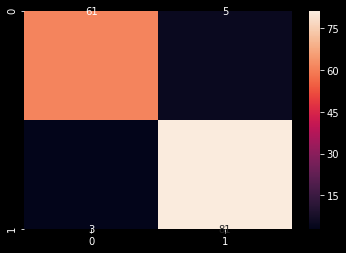

In [17]:
print ('test acc: %s' % accuracy_score(y_test, y_pred_logical))

cm = confusion_matrix(y_test, y_pred_logical)
sns.heatmap(cm, annot=True)